# Crime Analytics: Visualization of Incident Reports

In this assignment, I will analyze criminal incident data from Seattle or San Francisco to visualize patterns and, if desired, contrast and compare patterns across the two cities.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [17]:
sanfran_db = pd.read_csv('sanfrancisco_incidents_summer_2014.csv',parse_dates = ['Date'])
#seattle_db = pd.read_csv('seattle_incidents_summer_2014.csv')

In [5]:
sanfran_db.shape

(28993, 13)

In [6]:
sanfran_db.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

In [8]:
seattle_db.shape

(32779, 19)

In [9]:
seattle_db.columns

Index(['RMS CDW ID', 'General Offense Number', 'Offense Code',
       'Offense Code Extension', 'Offense Type', 'Summary Offense Code',
       'Summarized Offense Description', 'Date Reported',
       'Occurred Date or Date Range Start', 'Occurred Date Range End',
       'Hundred Block Location', 'District/Sector', 'Zone/Beat',
       'Census Tract 2000', 'Longitude', 'Latitude', 'Location', 'Month',
       'Year'],
      dtype='object')

In [10]:
sanfran_db.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


In [11]:
seattle_db.head(5)

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,NaN,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014


In [12]:
seattle_db.columns = ['RMSID', 'OffenseNumber', 'OffenseCode',
       'Extension', 'OffenseType', 'SummaryCode',
       'OffenseDescription', 'DateReported',
       'OccurredDateStart', 'OccurredDateEnd',
       'BlockLocation', 'District', 'Zone',
       'Census2000', 'Longitude', 'Latitude', 'Location', 'Month',
       'Year']

In [17]:
sanfran_missing_count = {}
def count_null(df):
    missing_count = {}
    for col in df.columns:
        missing_count[col]=len(df[df[col].isnull()])
    return missing_count

count_null(seattle_db)
count_null(sanfran_db)

{'RMSID': 0, 'OffenseNumber': 0, 'OffenseCode': 0, 'Extension': 0, 'OffenseType': 0, 'SummaryCode': 0, 'OffenseDescription': 0, 'DateReported': 0, 'OccurredDateStart': 0, 'OccurredDateEnd': 16280, 'BlockLocation': 0, 'District': 57, 'Zone': 56, 'Census2000': 134, 'Longitude': 0, 'Latitude': 0, 'Location': 0, 'Month': 0, 'Year': 0}
{'IncidntNum': 0, 'Category': 0, 'Descript': 0, 'DayOfWeek': 0, 'Date': 0, 'Time': 0, 'PdDistrict': 0, 'Resolution': 0, 'Address': 0, 'X': 0, 'Y': 0, 'Location': 0, 'PdId': 0}


In [19]:
# the date and time of incident are in two separate columns
# combining them into a date_time column
sanfran_db['date_time'] = pd.to_datetime(sanfran_db['Date'] + ' ' + sanfran_db['Time'])
date_idx = pd.DatetimeIndex(sanfran_db['date_time'])
sanfran_db['incident_date'] = date_idx.date.astype('datetime64')
sanfran_db['incident_hour'] = date_idx.hour
sanfran_db['incident_year'] = date_idx.year
sanfran_db['incident_month'] = date_idx.month
sanfran_db['incident_weekday'] = date_idx.weekday

by_year = sanfran_db.pivot_table('IncidntNum', aggfunc='count',
                            index='incident_year',
                            columns='incident_month')
by_year

incident_month,6,7,8
incident_year,,,
2014,9114,9671,10208


In [21]:
seattle_db['date_time'] = seattle_db['OccurredDateStart']
date_idx = pd.DatetimeIndex(seattle_db['date_time'])
seattle_db['incident_date'] = date_idx.date.astype('datetime64')
seattle_db['incident_hour'] = date_idx.hour
seattle_db['incident_year'] = date_idx.year
seattle_db['incident_month'] = date_idx.month
seattle_db['incident_weekday'] = date_idx.weekday

by_year2 = seattle_db.pivot_table('OffenseNumber', aggfunc='count',
                            index='incident_year',
                            columns='incident_month')
by_year2

incident_month,6,7,8
incident_year,,,
2014,11125,11154,10500


## Crime rate and frequency 

San Franciso Crimes Table 

Category		Number of Occurances
LARCENY/THEFT                  9466
OTHER OFFENSES                 3567
NON-CRIMINAL                   3023
ASSAULT                        2882
VEHICLE THEFT                  1966
WARRANTS                       1782
DRUG/NARCOTIC                  1345
SUSPICIOUS OCC                 1300
MISSING PERSON                 1266
SECONDARY CODES                 442
WEAPON LAWS                     354
ROBBERY                         308
TRESPASS                        281
FRAUD                           242
DRUNKENNESS                     147
KIDNAPPING                      117
PROSTITUTION                    112
DRIVING UNDER THE INFLUENCE     100
ARSON                            63
RUNAWAY                          61
LIQUOR LAWS                      42
DISORDERLY CONDUCT               31
FORGERY/COUNTERFEITING           18
VANDALISM                        17
SUICIDE                          14
FAMILY OFFENSES                  10
EMBEZ

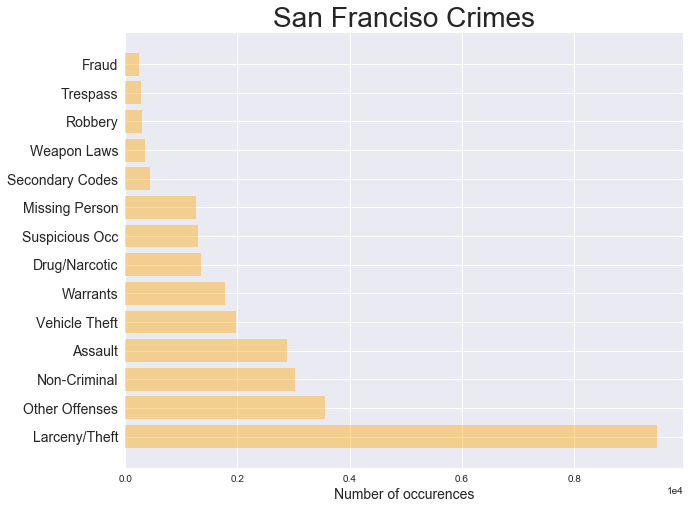

In [18]:
crime_incident = sanfran_db['Category'].value_counts()

#plot the bar chart 
y_pos = np.arange(len(crime_incident[0:14].keys()))
plt.figure(figsize=(10,8))
plt.barh(y_pos, crime_incident[0:14].get_values(),align='center',alpha=0.4,color = 'orange')
plt.yticks(y_axis, map(lambda x: x.title(), crime_incident[0:14].keys()), fontsize= 14)
plt.xlabel('Number of occurences', fontsize = 14)
plt.title('San Franciso Crimes', fontsize =28)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

print('San Franciso Crimes Table \n')
print('Category\t\tNumber of Occurances')
print(crime_incident)

## Crime by Hours 

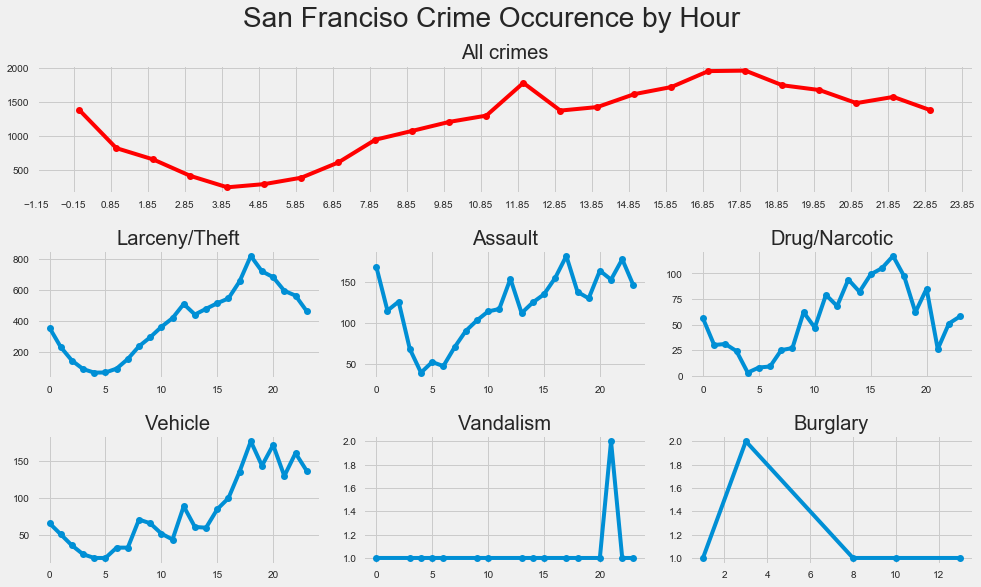

In [26]:
import pylab
import numpy as np

pylab.rcParams['figure.figsize'] = (14.0, 8.0)

sanfran_db.set_index(sanfran_db["Date"],inplace=True)

sanfran_db['DayOfWeek'] = sanfran_db.index.dayofweek
sanfran_db['Time'] =pd.to_datetime(sanfran_db['Time'])
sanfran_db['Hour'] = sanfran_db.Time.dt.hour
sanfran_db['Month'] = sanfran_db.index.month
sanfran_db['Year'] = sanfran_db.index.year
sanfran_db['DayOfMonth'] = sanfran_db.index.day

# #choose to plot the top 5 crimes
larceny = sanfran_db[sanfran_db['Category'] == "LARCENY/THEFT"]
assault = sanfran_db[sanfran_db['Category'] == "ASSAULT"]
drug = sanfran_db[sanfran_db['Category'] == "DRUG/NARCOTIC"]
vehicle = sanfran_db[sanfran_db['Category'] == "VEHICLE THEFT"]
vandalism = sanfran_db[sanfran_db['Category'] == "VANDALISM"]
burglary = sanfran_db[sanfran_db['Category'] == "BURGLARY"]

with plt.style.context('fivethirtyeight'):
    ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
    ax1.plot(sanfran_db.groupby('Hour').size(), 'ro-')
    ax1.set_title ('All crimes')
    start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(start, end, 1))
    
    ax2 = plt.subplot2grid((3,3), (1, 0))
    ax2.plot(larceny.groupby('Hour').size(), 'o-')
    ax2.set_title ('Larceny/Theft')
    
    ax3 = plt.subplot2grid((3,3), (1, 1))
    ax3.plot(assault.groupby('Hour').size(), 'o-')
    ax3.set_title ('Assault')
    
    ax4 = plt.subplot2grid((3,3), (1, 2))
    ax4.plot(drug.groupby('Hour').size(), 'o-')
    ax4.set_title ('Drug/Narcotic')
    
    ax5 = plt.subplot2grid((3,3), (2, 0))
    ax5.plot(vehicle.groupby('Hour').size(), 'o-')
    ax5.set_title ('Vehicle')
    
    ax6 = plt.subplot2grid((3,3), (2, 1))
    ax6.plot(vandalism.groupby('Hour').size(), 'o-')
    ax6.set_title ('Vandalism')
    
    ax7 = plt.subplot2grid((3,3), (2, 2))
    ax7.plot(burglary.groupby('Hour').size(), 'o-')
    ax7.set_title ('Burglary')
  
    pylab.gcf().text(0.5, 1.03, 
                    'San Franciso Crime Occurence by Hour',
                     horizontalalignment='center',
                     verticalalignment='top', 
                     fontsize = 28)
    
plt.tight_layout(2)
# #plt.show()

## Crime by day of week 

array([1, 3, 1, 1])

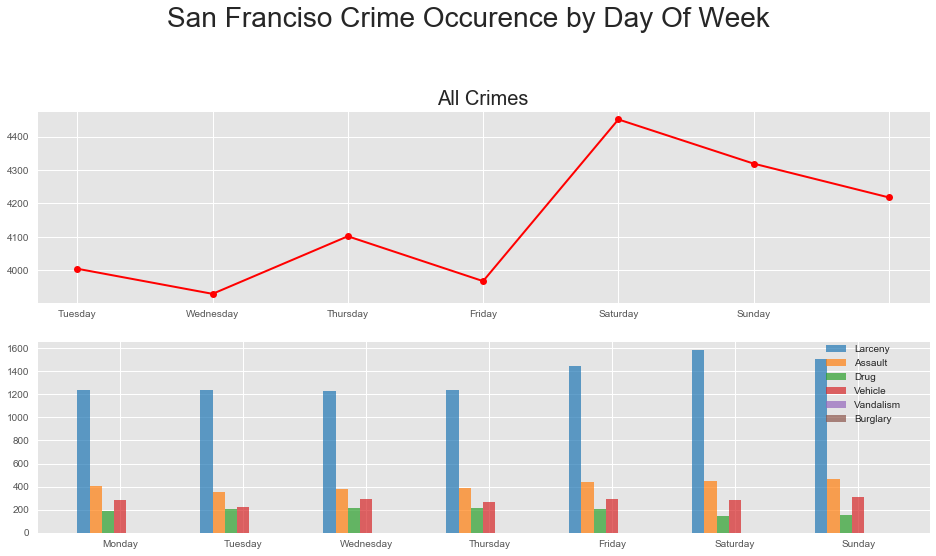

In [29]:
pylab.rcParams['figure.figsize'] = (16.0, 12.0)

plt.style.use('ggplot')

daysOfWeekIdx = sanfran_db.groupby('DayOfWeek').size().keys()
daysOfWeekLit = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
occursByWeek = sanfran_db.groupby('DayOfWeek').size().get_values()

# Linear plot for all crimes
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax1.plot(daysOfWeekIdx, occursByWeek, 'ro-', linewidth=2)
ax1.set_xticklabels(daysOfWeekLit)
ax1.set_title ('All Crimes', fontsize=20)
# ensure that ticks are only at the bottom and left parts of the plot
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()

# Bar plot
y = np.empty([6,7])
h = [None]*6
width = 0.1

ax2 = plt.subplot2grid((3,3), (1,0), colspan=3)

#
y[0] = larceny.groupby('DayOfWeek').size().get_values()
y[1] = assault.groupby('DayOfWeek').size().get_values()
y[2] = drug.groupby('DayOfWeek').size().get_values()
y[3] = vehicle.groupby('DayOfWeek').size().get_values()
#y[4] = vandalism.groupby('DayOfWeek').size().get_values()
#y[5] = burglary.groupby('DayOfWeek').size().get_values()

color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b']

for i in range(0,6):
    h[i] = ax2.bar(daysOfWeekIdx + i*width, y[i], width, color=color_sequence[i], alpha = 0.7)

ax2.set_xticks(daysOfWeekIdx + 3*width)
ax2.set_xticklabels(daysOfWeekLit)
# ensure that ticks are only at the bottom and left parts of the plot
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()

ax2.legend((item[0] for item in h), 
           ('Larceny', 'Assault', 'Drug', 'Vehicle', 'Vandalism', 'Burglary'), 
           bbox_to_anchor=(0.88, 1), loc=2, borderaxespad=0., frameon=False)

pylab.gcf().text(0.5, 1.00, 
            'San Franciso Crime Occurence by Day Of Week',
            horizontalalignment='center',
            verticalalignment='top', 
             fontsize = 28)


## Crime by Month 

In [52]:
burglary['Month'].unique()

array([8, 6])

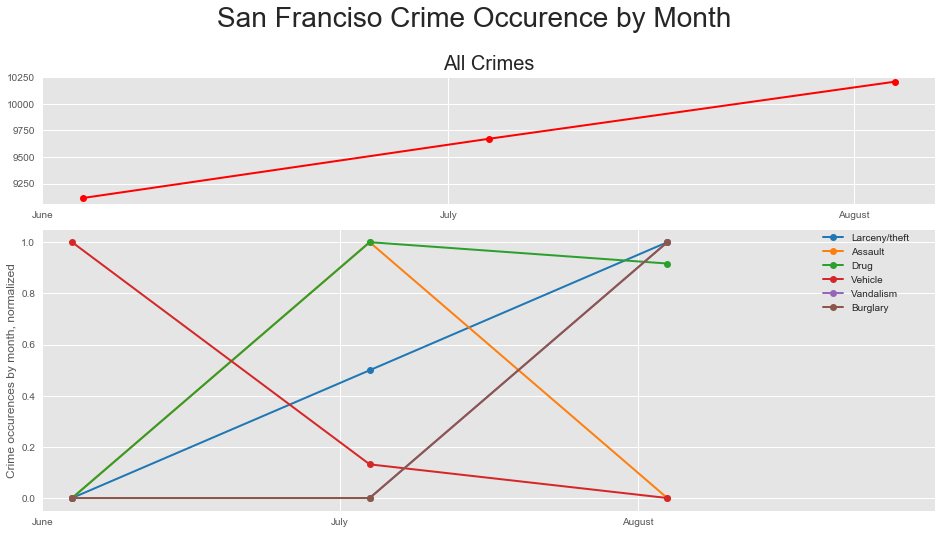

In [67]:
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

monthsIdx = sanfran_db.groupby('Month').size().keys() - 1
monthsLit = ['June', 'July','August']
occursByMonth = sanfran_db.groupby('Month').size().get_values()

# Linear plot for all crimes
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax1.plot(monthsIdx, occursByMonth, 'ro-', linewidth=2)
ax1.set_xticklabels(monthsLit)
ax1.set_title ('All Crimes', fontsize=20)
start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 1))

# ensure that ticks are only at the bottom and left parts of the plot
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()

# Linear normalized plot for 6 top crimes 
ax2 = plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2)

y = np.empty([6,3])
y[0] = larceny.groupby('Month').size().get_values()
y[1] = assault.groupby('Month').size().get_values()
y[2] = drug.groupby('Month').size().get_values()
y[3] = vehicle.groupby('Month').size().get_values()
y[4] = vandalism.groupby('Month').size().get_values()
#y[5] = burglary.groupby('Month').size().get_values()

crimes = ['Larceny/theft', 'Assault', 'Drug', 'Vehicle', 'Vandalism', 'Burglary']
color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b']

for i in range(0,6):
    y[i]= (y[i]-min(y[i]))/(max(y[i])-min(y[i]))  # normalization
    h[i] = ax2.plot(monthsIdx, y[i],'o-', color=color_sequence[i], lw=2)

ax2.set_ylabel("Crime occurences by month, normalized")

ax2.xaxis.set_ticks(np.arange(start, end+1, 1))
ax2.set_xticklabels(monthsLit)

ax2.legend((item[0] for item in h), 
           crimes, 
           bbox_to_anchor=(0.87, 1), loc=2, borderaxespad=0., frameon=False)

pylab.gcf().text(0.5, 1.00, 
            'San Franciso Crime Occurence by Month',
            horizontalalignment='center',
            verticalalignment='top', 
             fontsize = 28)

In [70]:
sanfran_db['Year'].unique()

array([2014])

## Crime by Year 2014

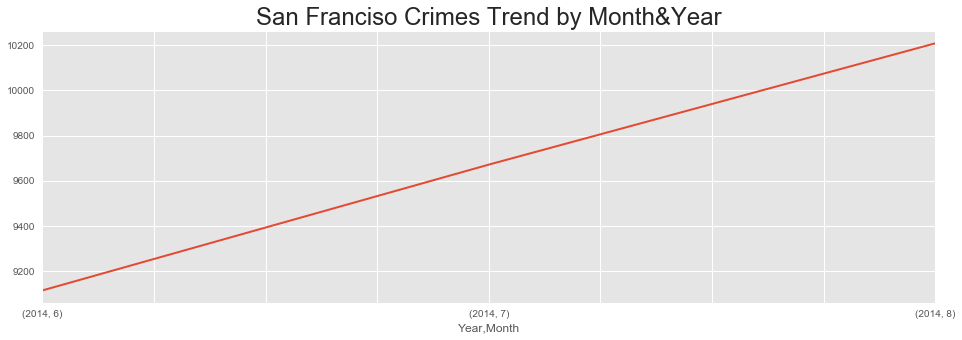

In [71]:
pylab.rcParams['figure.figsize'] = (16.0, 5.0)
yearMonth = sanfran_db.groupby(['Year','Month']).size()
ax = yearMonth.plot(lw=2)
plt.title('San Franciso Crimes Trend by Month&Year', fontsize=24)


# Density Plot 

In [72]:
categories = {c:i for i,c in enumerate(sanfran_db['Category'])}

In [74]:
# Get general distances based on coordinates (not used yet)
sanfran_db['Distance'] = [np.linalg.norm((x,y)) for x,y in zip(sanfran_db.X, sanfran_db.Y)]
# Add numerical category column (not used yet)
sanfran_db['Category_Num'] = [categories[t] for t in sanfran_db.Category]
sanfran_db[:1]

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Hour,Month,Year,DayOfMonth,Distance,Category_Num
Date,,,,,,,,,,,,,,,,,,,
2014-08-31,140734311,ARSON,ARSON OF A VEHICLE,6,2014-08-31,2017-06-30 23:50:00,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031,23,8,2014,31,128.091075,28930


In [77]:
from matplotlib.colors import LogNorm
# Plot 2D histogram of data with constraint
# Default constraint is category, which has 36 unique values (i.e. 12x3)
def plot_data(constraint='Category', rownum=12, colnum=3):
    _, ax = plt.subplots(nrows=rownum, ncols=colnum,figsize=(10,30))
    i = 0
    j = 0
    for cat in sanfran_db[constraint].unique():
        cat_sub = sanfran_db[sanfran_db[constraint] == cat]
        try:
            ax[j][i].hist2d(cat_sub.X, cat_sub.Y, bins=60, norm=LogNorm(), cmap=plt.cm.jet)
            ax[j][i].set_title('{0} {1}'.format(cat, len(cat_sub)))
        except(KeyError, IndexError):
            pass
        i+=1
        if i > colnum-1:
            i = 0
            j+=1
    plt.tight_layout()
    plt.show()

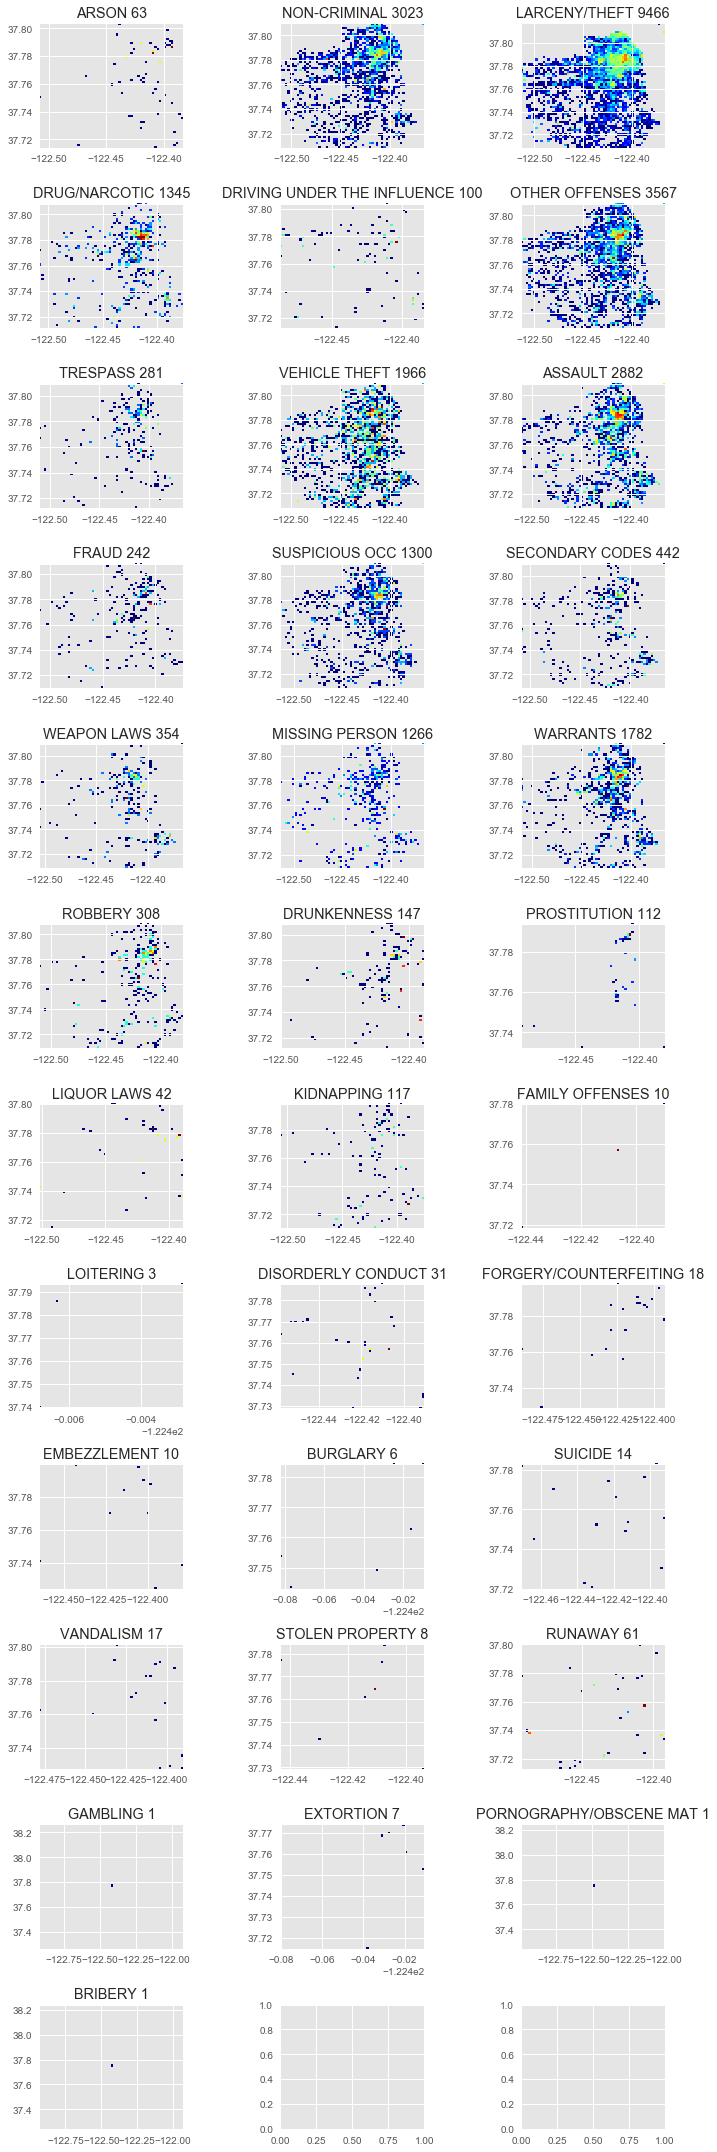

In [78]:
# Density of crime by Category
plot_data()

## Incident Categorization based on this site
http://www.legalmatch.com/law-library/article/what-are-the-different-types-of-crimes.html


In [22]:
map_categories = {
'[INC - CASE DC USE ONLY]': 'OTHER OFFENSES',
'ANIMAL COMPLAINT': 'OTHER OFFENSES',
'ARSON': 'PROPERTY',
'ASSAULT': 'PERSONAL',
'BIAS INCIDENT': 'INCHOATE',
'BIKE THEFT': 'PROPERTY',
'BRIBERY': 'PROPERTY',
'BURGLARY': 'PROPERTY',
'BURGLARY-SECURE PARKING-RES': 'PROPERTY',
'CAR PROWL': 'INCHOATE',
'COUNTERFEIT': 'PROPERTY',
'DISORDERLY CONDUCT': 'INCHOATE',
'DISPUTE': 'INCHOATE',
'DISTURBANCE': 'INCHOATE',
'DRIVING UNDER THE INFLUENCE': 'STATUTORY',
'DRUG/NARCOTIC': 'STATUTORY',
'DRUNKENNESS': 'STATUTORY',
'DUI': 'STATUTORY',
'ELUDING': 'INCHOATE',
'EMBEZZLE': 'PROPERTY',
'EMBEZZLEMENT': 'PROPERTY',
'ESCAPE': 'STATUTORY',
'EXTORTION': 'INCHOATE',
'FALSE REPORT': 'INCHOATE',
'FAMILY OFFENSES': 'INCHOATE',
'FIREWORK': 'PROPERTY',
'FORGERY': 'PROPERTY',
'FORGERY/COUNTERFEITING': 'PROPERTY',
'FRAUD': 'PROPERTY',
'GAMBLING': 'PROPERTY',
'HOMICIDE': 'PERSONAL',
'ILLEGAL DUMPING': 'STATUTORY',
'INJURY': 'PERSONAL',
'KIDNAPPING': 'PERSONAL',
'LARCENY/THEFT': 'PROPERTY',
'LIQUOR LAWS': 'STATUTORY',
'LIQUOR VIOLATION': 'STATUTORY',
'LOITERING': 'INCHOATE',
'LOST PROPERTY': 'PROPERTY',
'MAIL THEFT': 'PROPERTY',
'MISSING PERSON': 'PERSONAL',
'NARCOTICS': 'STATUTORY',
'NON-CRIMINAL': 'NON-CRIMINAL',
'OBSTRUCT': 'PROPERTY',
'OTHER OFFENSES': 'OTHER OFFENSES',
'OTHER PROPERTY': 'PROPERTY',
'PICKPOCKET': 'PROPERTY',
'PORNOGRAPHY': 'INCHOATE',
'PORNOGRAPHY/OBSCENE MAT': 'INCHOATE',
'PROPERTY DAMAGE': 'PROPERTY',
'PROSTITUTION': 'INCHOATE',
'PUBLIC NUISANCE': 'INCHOATE',
'PURSE SNATCH': 'PROPERTY',
'RECKLESS BURNING': 'PROPERTY',
'RECOVERED PROPERTY': 'PROPERTY',
'ROBBERY': 'PROPERTY',
'RUNAWAY': 'INCHOATE',
'SECONDARY CODES': 'STATUTORY',
'SHOPLIFTING': 'PROPERTY',
'STOLEN PROPERTY': 'PROPERTY',
'SUICIDE': 'PERSONAL',
'SUSPICIOUS OCC': 'PROPERTY',
'THEFT OF SERVICES': 'PROPERTY',
'THREATS': 'INCHOATE',
'TRAFFIC': 'STATUTORY',
'TRESPASS': 'INCHOATE',
'VANDALISM': 'PROPERTY',
'VEHICLE THEFT': 'PROPERTY',
'VIOLATION OF COURT ORDER': 'STATUTORY',
'WARRANT ARREST': 'STATUTORY',
'WARRANTS': 'STATUTORY',
'WEAPON': 'STATUTORY',
'WEAPON LAWS': 'STATUTORY'
}

# Map the incident codes to a smaller set
seattle_db['incident_category'] = seattle_db['OffenseDescription'].apply(lambda col: map_categories[col])
sanfran_db['incident_category'] = sanfran_db['Category'].apply(lambda col: map_categories[col])

## Incident trend by category

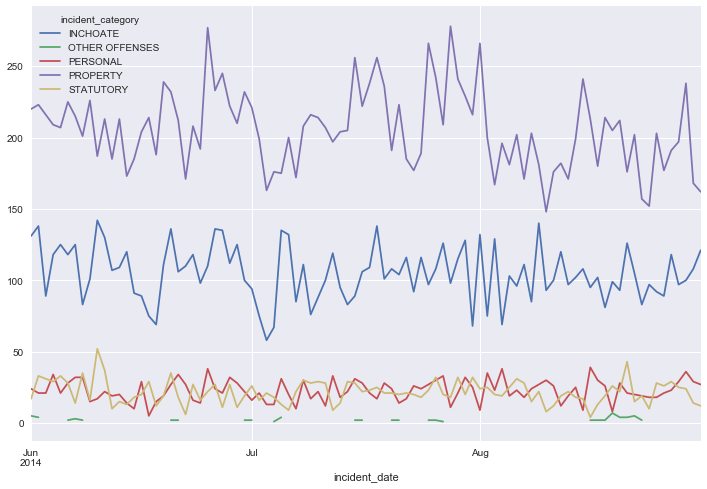

In [29]:
by_date = seattle_db.pivot_table('OffenseNumber', aggfunc='count',
                            index='incident_date',
                            columns='incident_category' )
ax = by_date.plot(figsize=(12,8))
ax.figure.savefig('seattle_incidents_by_date.png', bbox_inches='tight')

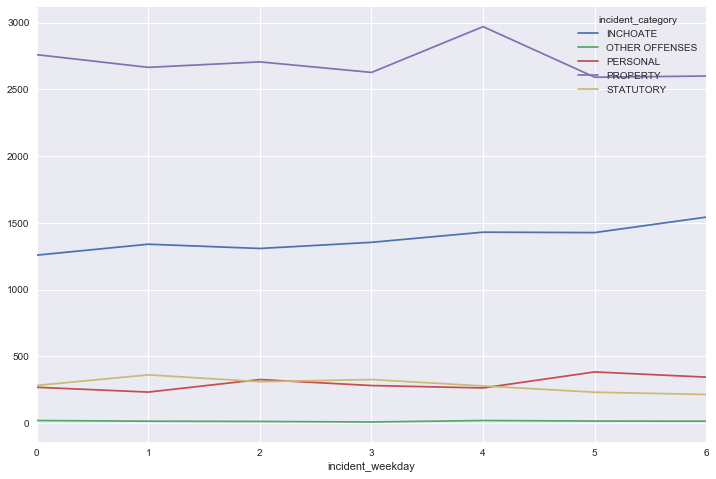

In [32]:
by_weekday = seattle_db.pivot_table('OffenseNumber', aggfunc='count',
                            index='incident_weekday',
                            columns='incident_category')   

ax = by_weekday.plot(figsize=(12,8))
ax.figure.savefig('incidents_by_weekday.png', bbox_inches='tight')

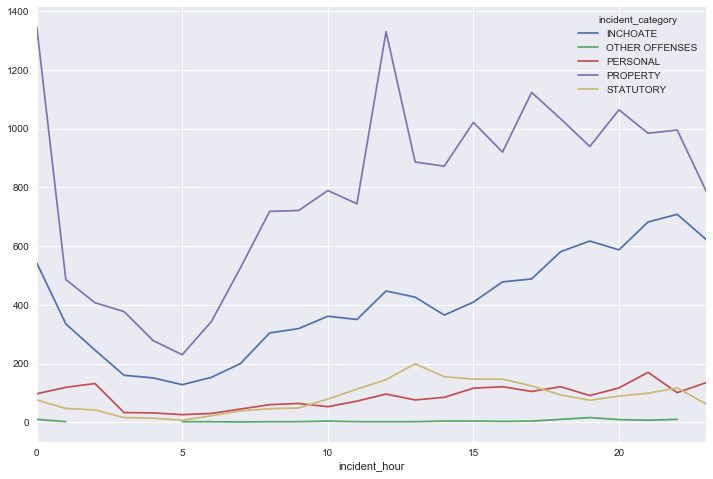

In [33]:
by_hour = seattle_db.pivot_table('OffenseNumber', aggfunc='count',
                            index='incident_hour',
                            columns='incident_category')   
ax = by_hour.plot(figsize=(12,8))
ax.figure.savefig('incidents_by_hour.png', bbox_inches='tight')

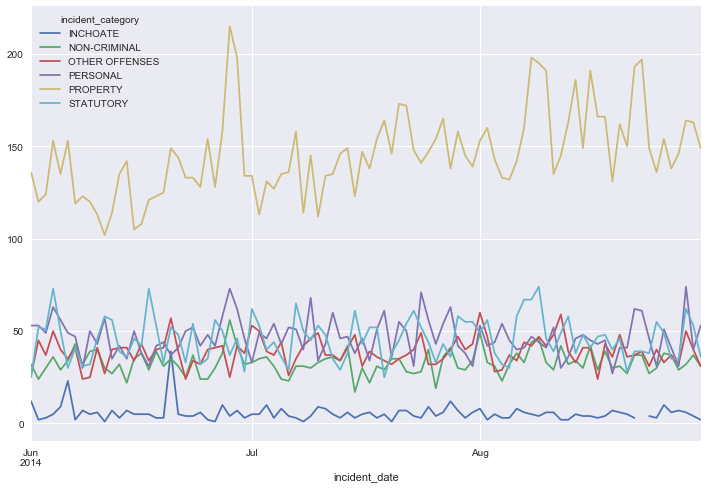

In [35]:
by_date = sanfran_db.pivot_table('IncidntNum', aggfunc='count',
                            index='incident_date',
                            columns='incident_category' )
ax = by_date.plot(figsize=(12,8))
ax.figure.savefig('sanfran_incidents_by_date.png', bbox_inches='tight')
